# This project will predict survivors of the Titanic.

## Importing the libraries needed for the program.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

## Importing the CSV Titanic dataset.

In [2]:
data = pd.read_csv("C:/Users/gavin/Jupyter/Datasets/Titanic_Data.csv")

## Begin cleaning the dataset by dropping unnecessary columns for predicting survivors.

In [3]:
data = data.drop(["home.dest","body","boat","embarked","fare","ticket","cabin"],axis=1)

## Cleaning data set continues by removing any rows with missing values.

In [4]:
data = data.dropna(subset =["age", "survived"])

## This prints the shape of our dataset after cleaning it, 1046 rows by 7columns.

In [5]:
data.shape

(1046, 7)

## data.head(10) will print the first 10 rows of the current state of our dataset.

In [6]:
data.head(10)

,pclass,survived,name,sex,age,sibsp,parch
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0


## data.describe() will print statistics for any column with int values in float values.

In [7]:
data.describe()

,pclass,survived,age,sibsp,parch
count,1046.000000,1046.000000,1046.000000,1046.000000,1046.00000
mean,2.207457,0.408222,29.881135,0.502868,0.42065
std,0.841497,0.491740,14.413500,0.912167,0.83975
min,1.000000,0.000000,0.166700,0.000000,0.00000
25%,1.000000,0.000000,21.000000,0.000000,0.00000
50%,2.000000,0.000000,28.000000,0.000000,0.00000
75%,3.000000,1.000000,39.000000,1.000000,1.00000
max,3.000000,1.000000,80.000000,8.000000,6.00000


##  Now that our dataset is cleaned, we can print the count of survivors.

In [8]:
survival_status = {0: 'Non-Survivor', 1: 'Survivor'}
print(data['survived'].map(survival_status).value_counts())

survived
Non-Survivor    619
Survivor        427
Name: count, dtype: int64


## Here we can visually see a bar graph of survivors.

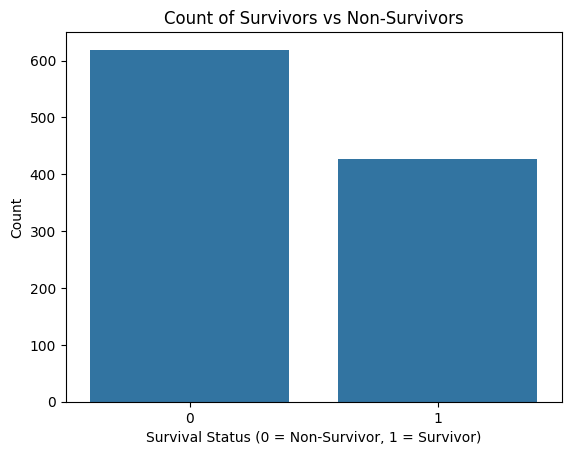

In [9]:
sb.countplot(x='survived', data=data)
plt.xlabel('Survival Status (0 = Non-Survivor, 1 = Survivor)')
plt.ylabel('Count')
plt.title('Count of Survivors vs Non-Survivors')
plt.show()

## Here we import an encoder & name it. The encoder allows us to convert data into workable values.

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

## Now we encode 'sex' in column 3 to convert male & female into 0, & 1.

In [11]:
data.iloc[:,3]=labelencoder.fit_transform(data.iloc[:,3].values)

## We can confirm our encoder works by printing the unique value for 'sex'

In [12]:
print(data['sex'].unique())

[0 1]


## Below we split the data set into X & Y datasets.

In [13]:
y= data['survived']
features = ['pclass', 'age','sex']
X = data[features]

## Here we normalize X for our features dataset.

In [14]:
X = (X.max() - X) / (X.max() - X.min())

## Now we implement our Kmeans algorithm

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, max_iter=500, algorithm = 'elkan',random_state=1)
kmeans.fit(X)

KMeans(algorithm='elkan', max_iter=500, n_clusters=2, random_state=1)

## Here we initiate the prediction of survivors.

In [16]:
correct = 0
prediction = kmeans.predict(X)
pred_df = pd.DataFrame({'actual': y, 'prediction': prediction})
print(pred_df)

      actual  prediction
0          1           0
1          1           1
2          0           0
3          0           1
4          0           0
...      ...         ...
1301       0           1
1304       0           0
1306       0           1
1307       0           1
1308       0           1

[1046 rows x 2 columns]


## Below we test the accuracy of our prediction after transforming the panda series into an array. 

In [21]:
ylist = y.values

for i in range(len(y)):
    if prediction[i] == ylist[i]:
        correct += 1
        
print(correct/len(y)*100,'%')

44.168260038240916 %


## Our unsupervised K-means model gives us 22% percent accuracy when predicting the correct survivors. An unsupervised K-means model may not be the best option for this. 
## Let's try a Random Forest model instead.

In [22]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = rf_model.score(X_test, y_test)
print("Accuracy:", accuracy*100,'%')

Accuracy: 73.80952380952381 %


## Here we get a much better accuracy rate with a Random Forest model with 73% to predict the correct survivors.
## Let's take it a bit further & validate the testing accuracy by tuning hyperparameters with different combinations to find the best results.

In [23]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best Score: 0.8253635585970915


## We have found the best parameters to use for the model, lets plug it in to the test set & see what results we get.

In [25]:
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, min_samples_leaf=1, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = rf_model.score(X_test, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.7333333333333333


## It looks like we have a slight decrease in accuracy from our original test set. This may suggest overfitting or the model being sensitive to the hyperparameter settings.

 ## We could try: 
## Feature engineering: Extracting more informative features from the dataset to improve the model's performance.
## Hyperparameter tuning: Trying out different hyperparameters or using more advanced techniques like Bayesian optimization.
## Ensemble methods: Combining mutiple models to create more accurate predictions.
## * Coming Soon *